In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [10]:
time = []
operation = []
nNodes = []
saturation = []
graph_type = []

with open("output.csv", "r") as f:
    for line in f.readlines():
        line = line.strip().split()
        time.append(line[0])
        operation.append(line[1])
        nNodes.append(line[2])
        saturation.append(line[3])
        graph_type.append(line[4])

df = pd.DataFrame({
    "time": time,
    "operation": operation,
    "nNodes": nNodes,
    "saturation": saturation,
    "graph_type": graph_type
})

df['time'] = df['time'].astype("float32")
df['time'] = df['time'] / 10**6
df['operation'] = df['operation'].str.replace("hamilton", "find-hamilton")
df['nNodes'] = df['nNodes'].astype("float32")
df['saturation'] = df['saturation'].astype("float32")
df['graph_type'] = df['graph_type'].str.replace("-h", "hamilton")
df['graph_type'] = df['graph_type'].str.replace("-nh", "non-hamilton")

df.head()

,time,operation,nNodes,saturation,graph_type
0,0.000000,find-hamilton,1.0,30.0,hamilton
1,0.000000,find-hamilton,2.0,30.0,hamilton
2,0.000000,find-hamilton,3.0,30.0,hamilton
3,0.000000,find-hamilton,4.0,30.0,hamilton
4,0.001137,find-hamilton,5.0,30.0,hamilton


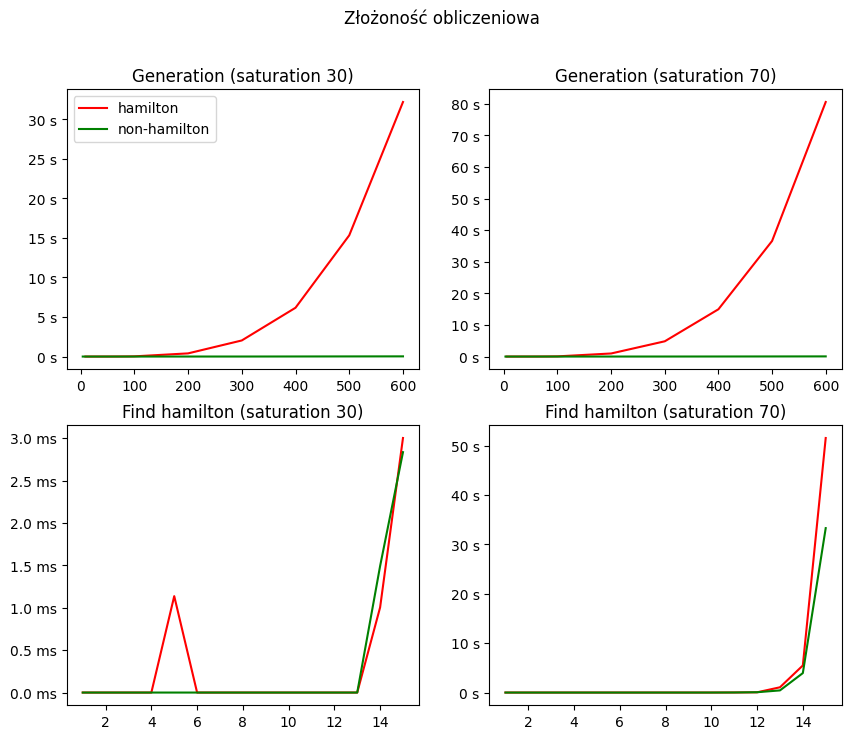

In [24]:
hamilton30 = df[(df['graph_type'] == "hamilton") & (df['saturation'] == 30)]
hamilton70 = df[(df['graph_type'] == "hamilton") & (df['saturation'] == 70)]
nonHamilton30 = df[(df['graph_type'] == "non-hamilton") & (df['saturation'] == 30)]
nonHamilton70 = df[(df['graph_type'] == "non-hamilton") & (df['saturation'] == 70)]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle("Złożoność obliczeniowa")

# LT generation by graph type (saturation 30)
ax[0][0].set_title("Generation (saturation 30)")
ax[0][0].plot(
    hamilton30[hamilton30['operation'] == "generate"]['nNodes'],
    hamilton30[hamilton30['operation'] == "generate"]['time'],
    color='red', label='hamilton'
)
ax[0][0].plot(
    nonHamilton30[nonHamilton30['operation'] == "generate"]['nNodes'],
    nonHamilton30[nonHamilton30['operation'] == "generate"]['time'],
    color='green', label='non-hamilton'
)
ax[0][0].set_yticks(np.arange(0, 31, 5), [f"{v} s" for v in np.arange(0, 31, 5)])
ax[0][0].legend()

# LT generation by graph type (saturation 70)
ax[0][1].set_title("Generation (saturation 70)")
ax[0][1].plot(
    hamilton70[hamilton70['operation'] == "generate"]['nNodes'],
    hamilton70[hamilton70['operation'] == "generate"]['time'],
    color='red', label='hamilton'
)
ax[0][1].plot(
    nonHamilton70[nonHamilton70['operation'] == "generate"]['nNodes'],
    nonHamilton70[nonHamilton70['operation'] == "generate"]['time'],
    color='green', label='non-hamilton'
)
ax[0][1].set_yticks(np.arange(0, 81, 10), [f"{v} s" for v in np.arange(0, 81, 10)])

# LT find hamilton by graph type (saturation 30)
ax[1][0].set_title("Find hamilton (saturation 30)")
ax[1][0].plot(
    hamilton30[hamilton30['operation'] == "find-hamilton"]['nNodes'],
    hamilton30[hamilton30['operation'] == "find-hamilton"]['time'],
    color='red', label='hamilton'
)
ax[1][0].plot(
    nonHamilton30[nonHamilton30['operation'] == "find-hamilton"]['nNodes'],
    nonHamilton30[nonHamilton30['operation'] == "find-hamilton"]['time'],
    color='green', label='non-hamilton'
)
ax[1][0].set_yticks(np.arange(0, 0.0031, 0.0005), [f"{v*1000} ms" for v in np.arange(0, 0.0031, 0.0005)])

# LT find hamilton by graph type (saturation 30)
ax[1][1].set_title("Find hamilton (saturation 70)")
ax[1][1].plot(
    hamilton70[hamilton70['operation'] == "find-hamilton"]['nNodes'],
    hamilton70[hamilton70['operation'] == "find-hamilton"]['time'],
    color='red', label='hamilton'
)
ax[1][1].plot(
    nonHamilton70[nonHamilton70['operation'] == "find-hamilton"]['nNodes'],
    nonHamilton70[nonHamilton70['operation'] == "find-hamilton"]['time'],
    color='green', label='non-hamilton'
)
ax[1][1].set_yticks(np.arange(0, 51, 10), [f"{v} s" for v in np.arange(0, 51, 10)])

fig.savefig("graph.png")
plt.show()